In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure',figsize=(14,8))

In [3]:
colnames=['date', 'time', 'destination', 'user', 'uk', 'ip']
df = pd.read_csv('curriculum-access.txt', sep=' ', header=None, 
               names=colnames)

In [4]:
df.head()

,date,time,destination,user,uk,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [5]:
df['datetime'] = df.date.astype(str) + ' ' + df.time.astype(str)
df.datetime = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.drop(columns=['date','time'])

In [6]:
df.head(15)

,destination,user,uk,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
2018-01-26 09:56:41,javascript-i/loops,2,22.0,98.106.20.62
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62
2018-01-26 09:56:48,javascript-i/functions,3,22.0,98.106.20.62
2018-01-26 09:56:59,javascript-i/loops,2,22.0,98.106.20.62


In [7]:
df.shape

(543596, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543596 entries, 2018-01-26 09:55:03 to 2020-05-15 15:06:05
Data columns (total 4 columns):
destination    543595 non-null object
user           543596 non-null int64
uk             515740 non-null float64
ip             543596 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 20.7+ MB


In [9]:
df.uk.value_counts(dropna=False).sort_index()

1.0      8882
2.0        93
4.0         4
5.0         1
6.0        72
7.0       495
8.0      1712
9.0         5
11.0      204
12.0      270
13.0     2626
14.0     9374
15.0      691
16.0      743
17.0     4821
18.0     1641
19.0     1165
21.0     7411
22.0    28997
23.0    28193
24.0    35336
25.0    25364
26.0    27586
27.0    20264
28.0    37409
29.0    36613
31.0    24322
32.0    27920
33.0    38851
34.0    23845
51.0    26389
52.0    26212
53.0    29992
55.0    14252
56.0    14438
57.0     9547
NaN     27856
Name: uk, dtype: int64

In [10]:
dfna = df[df.uk.isnull()]

In [11]:
dfna.destination.value_counts()

/                                     2961
search/search_index.json              1515
Intro_to_Regression_Module             397
Regression_Python                      355
3.0-mysql-overview                     309
                                      ... 
13.01.02.01_Prep                         1
2-stats/4.3-sampling                     1
11.02_TransformData.md                   1
3-sql/12-more-exercises                  1
examples/javascript/inventory.json       1
Name: destination, Length: 923, dtype: int64

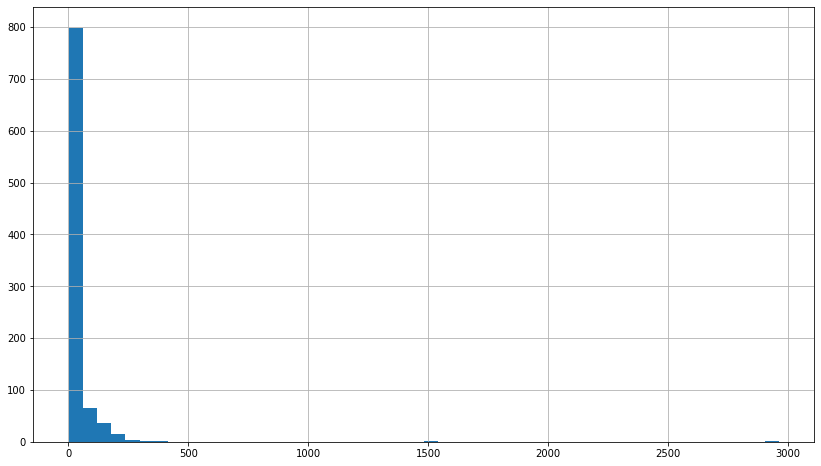

In [12]:
dfna.destination.value_counts().hist(bins=50)

In [13]:
df_new = df[df.uk == 57]

In [14]:
df_new.user.value_counts().sort_index()

619      1
621    528
622    397
623    178
624    197
625    302
626    211
627    637
628    261
629    297
630    296
631    300
632    553
633    447
634    489
635    434
636    311
637    514
638    334
639    317
640    782
641    436
642    162
643    312
644    426
645    425
Name: user, dtype: int64

In [15]:
high_use = df.user.value_counts(dropna=False)\
            [(df.user.value_counts(dropna=False) > 2000)].index.tolist()
# sorted(high_use)

In [16]:
df.uk[df.user.isin(high_use)].value_counts(dropna=False).sort_index()

1.0      7615
8.0      1617
14.0     8197
17.0     3549
19.0       75
23.0     3495
24.0     2308
26.0    11108
27.0     2061
28.0    30297
29.0    15051
32.0    12813
33.0     6756
34.0     2120
51.0     2169
52.0     5501
53.0     9927
NaN      7257
Name: uk, dtype: int64

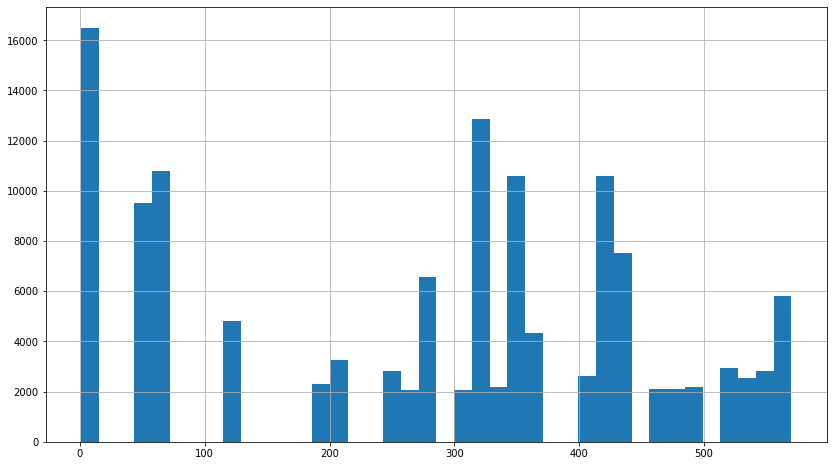

In [17]:
df.user[df.user.isin(high_use)].hist(bins = len(high_use))

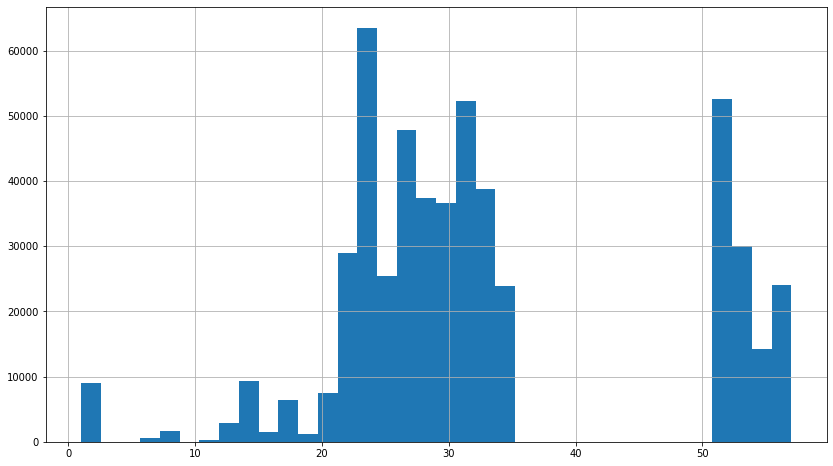

In [18]:
df.uk.hist(bins=len(df.uk.value_counts()))

In [19]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index()\
                    .rename(index=str, 
                       columns={'index': 'ip', 'ip': 'ip_count'})
ip_df2 = pd.DataFrame(df.ip.value_counts(dropna=False)/df.ip.count())\
                    .reset_index().rename(index=str, 
                       columns={'index': 'ip', 'ip': 'ip_proba'})
ip_df = ip_df.merge(ip_df2)

In [20]:
ip_df

,ip,ip_count,ip_proba
0,98.106.20.59,284579,0.523512
1,98.106.20.62,61662,0.113434
2,193.172.118.211,9029,0.016610
3,13.107.209.195,4219,0.007761
4,173.125.68.94,2980,0.005482
...,...,...,...
3490,200.117.116.144,1,0.000002
3491,65.251.228.84,1,0.000002
3492,108.78.222.67,1,0.000002
3493,100.204.27.61,1,0.000002


In [21]:
ip_df[ip_df.ip_proba > .005]

,ip,ip_count,ip_proba
0,98.106.20.59,284579,0.523512
1,98.106.20.62,61662,0.113434
2,193.172.118.211,9029,0.016610
3,13.107.209.195,4219,0.007761
4,173.125.68.94,2980,0.005482


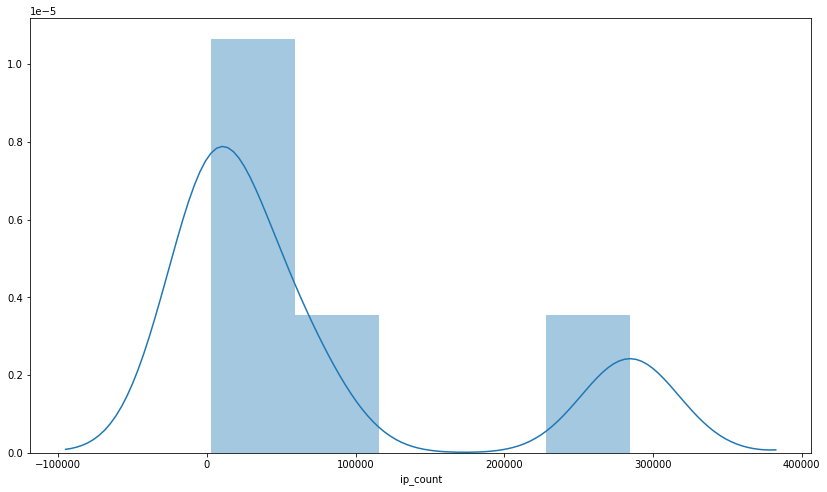

In [22]:
sns.distplot(ip_df.ip_count[ip_df.ip_proba > .005])

In [23]:
train = df[df.index.year <= 2019]

In [24]:
ip_df = pd.DataFrame(train.ip.value_counts(dropna=False)/\
                     train.ip.count()).reset_index().rename(index=str, 
                        columns={'index': 'ip', 'ip': 'ip_proba'})
ip_df

,ip,ip_proba
0,98.106.20.59,0.576920
1,98.106.20.62,0.146149
2,193.172.118.211,0.019928
3,71.123.41.63,0.003171
4,67.70.109.118,0.002842
...,...,...
2737,131.46.20.89,0.000002
2738,217.5.54.36,0.000002
2739,68.199.117.193,0.000002
2740,100.204.28.49,0.000002


In [25]:
df = df.reset_index().merge(ip_df, on=['ip'], how='left')\
        .fillna(value=0).set_index('datetime')
df.ip_proba.value_counts()

0.576920    284579
0.146149     61662
0.000000     53904
0.019928      9029
0.000069      4728
             ...  
0.000216        91
0.000199        88
0.000204        86
0.000180        82
0.000187        79
Name: ip_proba, Length: 286, dtype: int64

In [27]:
df

,destination,user,uk,ip,ip_proba
datetime,,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62,0.146149
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,0.146149
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,0.146149
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,0.146149
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,0.146149
...,...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68,0.000000
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38,0.000000
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,0.000000


In [42]:
df[df.index.year==2020]

,destination,user,uk,ip,ip_proba
datetime,,,,,
2020-01-01 07:26:11,mysql,515,33.0,68.12.216.98,0.002202
2020-01-01 07:26:16,mysql/introduction,515,33.0,68.12.216.98,0.002202
2020-01-01 08:40:24,java-i,506,51.0,24.119.236.1,0.000166
2020-01-01 08:40:33,java-ii,506,51.0,24.119.236.1,0.000166
2020-01-01 08:40:44,java-i,506,51.0,24.119.236.1,0.000166
...,...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68,0.000000
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38,0.000000
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17,0.000000


In [37]:
len(df.user[df.uk == 0].value_counts())

51

In [40]:
df.destination.isna().sum()

0

In [53]:
websites = df.destination.unique().tolist()
websites

['/',
 'java-ii',
 'java-ii/object-oriented-programming',
 'slides/object_oriented_programming',
 'javascript-i/conditionals',
 'javascript-i/loops',
 'javascript-i/functions',
 'mkdocs/search_index.json',
 'javascript-i/introduction/working-with-data-types-operators-and-variables',
 'javascript-i',
 'javascript-i/introduction/variables',
 'javascript-i/introduction/operators',
 'git/merge-conflict-demo',
 'git/working-in-teams',
 'javascript-i/introduction/primitive-types',
 'javascript-i/javascript-with-html',
 'spring',
 'appendix',
 'spring/extra-features/file-upload',
 'appendix/capstone-workbook',
 'javascript-i/objects/math',
 'index.html',
 'java-i',
 'appendix/further-reading/javascript/hoisting.html',
 'html-css/introduction',
 'javascript-i/bom-and-dom',
 'javascript-i/bom-and-dom/bom',
 'examples/javascript/defuse-the-bom.html',
 'javascript-i/introduction',
 'javascript-i/bom-and-dom/dom',
 'examples/javascript/dom-query-js.html',
 'spring/fundamentals/security/authenticat